In [39]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [40]:
# load dataset and get a peek
df = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
# check any empty row
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [42]:
# check duplicate records
df.duplicated(keep='first').sum()

240

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
# rename columns for conventional names
df.rename(columns=lambda x: x.replace(" ","_"), inplace=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [45]:
# summary of datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1359 non-null   float64
 1   volatile_acidity      1359 non-null   float64
 2   citric_acid           1359 non-null   float64
 3   residual_sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free_sulfur_dioxide   1359 non-null   float64
 6   total_sulfur_dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [46]:
# summary statistic of the data

df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [47]:
# correlation among features
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile_acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric_acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual_sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free_sulfur_dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total_sulfur_dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


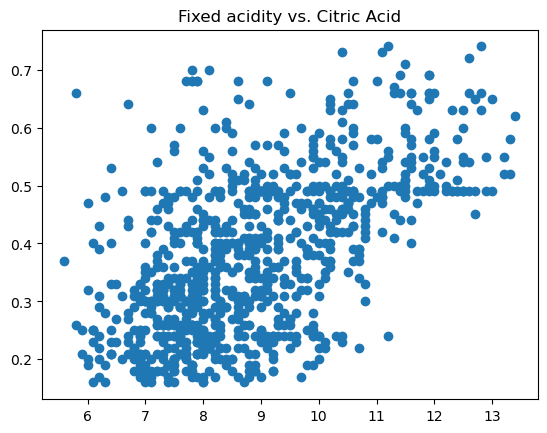

In [48]:
# drop some outilers in fixed acidity column
df.drop(df.loc[df['fixed_acidity'] >=13.5].index, inplace=True)
df.drop(df.loc[df['fixed_acidity'] <= 5.5].index, inplace=True)
df.drop(df.loc[df['citric_acid'] <= 0.15].index, inplace=True)
df.drop(df.loc[df['citric_acid'] >= 0.75].index, inplace=True)


# visualizations of features based on the correlations
plt.scatter(df.fixed_acidity, df.citric_acid)
plt.title('Fixed acidity vs. Citric Acid')
plt.show()

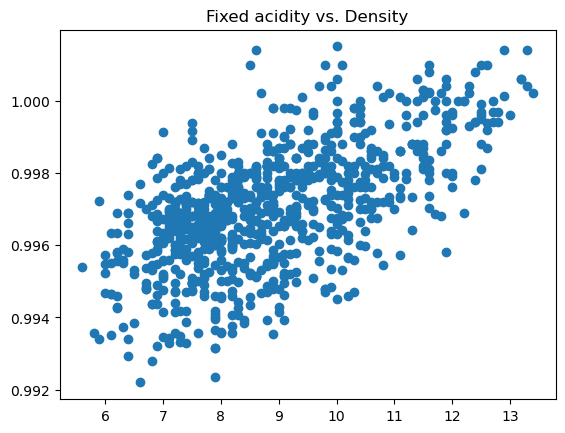

In [49]:
df.drop(df.loc[df['density'] >= 1.002].index, inplace=True)
df.drop(df.loc[df['density'] <= 0.992].index, inplace=True)


plt.scatter(df.fixed_acidity, df.density)
plt.title('Fixed acidity vs. Density')
plt.show()

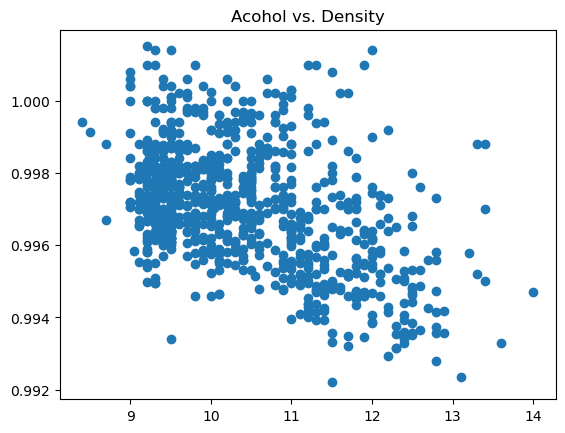

In [53]:
plt.scatter(df.alcohol, df.density)
plt.title('Acohol vs. Density')
plt.show()